In [27]:
import os
import torch
from torch import nn
from runner import *
from net import ConvNet4
from utils import report_from, Verbosity, list_to_string,\
    plot_outputs_single_network_arch_from_list

verbose = Verbosity.No

tensorboard_output = False
if tensorboard_output:
    os.system('rm -rf ./runs >> /dev/null&')
    os.system('tensorboard --logdir=runs --bind_all &')

test_rounds = 1
lr = 1e-4
batch_size = 100


def do_train_test(epochs, filename):
    CNN_outputs = {}
    CNN_train_losses = {}
    CNN_test_losses = {}
    CNN_train_accs = {}
    CNN_test_accs = {}
    CNN_run_output = []
    for i in range(test_rounds):
        model_CNN = ConvNet4()

        optimizer_CNN = torch.optim.Adam(model_CNN.parameters(), lr=lr)
        criterion_CNN = nn.BCELoss()

        CNN = ConvRunner(model_CNN, [criterion_CNN], optimizer_CNN,
                        epochs, batch_size,
                        name=f'MLP_VANILLA',
                        weights=[1.0, 1.0, 1.0],
                        writer_bool=tensorboard_output, verbose=verbose)
        CNN_run_output.append(CNN.run())
        CNN_train_losses[0] = CNN.train_loss
        CNN_test_losses[0] = CNN.test_loss
        CNN_train_accs[0] = CNN.train_acc
        CNN_test_accs[0] = CNN.test_acc
        CNN_outputs = {"CNN_train_losses": CNN_train_losses,
                       "CNN_test_losses": CNN_test_losses,
                       "CNN_train_accs": CNN_train_accs,
                       "CNN_test_accs": CNN_test_accs}
    report_from(CNN_run_output, f"CNN_VANILLA")

#     CC_outputs = {}
#     CC_train_losses = {}
#     CC_test_losses = {}
#     CC_train_accs = {}
#     CC_test_accs = {}
#     for hidden_size in hidden_sizes_list:
#         CC_run_output = []
#         for i in range(test_rounds):
#             model_cc = NeuralNetCalssifierComparer(
#                 input_size_cc,
#                 hidden_size,
#                 hidden_sizes_comparer=[80, 80, 20],
#                 batchnorm_classifer_bool=True,
#                 dropout_classifier_bool=True)
#             optimizer_cc = torch.optim.Adam(model_cc.parameters(), lr=lr)
#             criterion_cc = nn.BCELoss()

#             CC = MLPClassifierComparerRunner(
#                 model_cc, [criterion_cc], optimizer_cc,
#                 epochs, batch_size,
#                 name=f'MLP_classifier_comparer_{i}_{hidden_size}',
#                 writer_bool=tensorboard_output, verbose=verbose)
#             CC_run_output.append(CC.run())
#             CC_train_losses[list_to_string(hidden_size)] = CC.train_loss
#             CC_test_losses[list_to_string(hidden_size)] = CC.test_loss
#             CC_train_accs[list_to_string(hidden_size)] = CC.train_acc
#             CC_test_accs[list_to_string(hidden_size)] = CC.test_acc
#             CC_outputs = {"CC_train_losses": CC_train_losses,
#                           "CC_test_losses": CC_test_losses,
#                           "CC_train_accs": CC_train_accs,
#                           "CC_test_accs": CC_test_accs}
#         report_from(CC_run_output, f"MLP_classifier_comparer_{hidden_size}")


#     CC_AUX_outputs = {}
#     CC_AUX_train_losses = {}
#     CC_AUX_test_losses = {}
#     CC_AUX_train_accs = {}
#     CC_AUX_test_accs = {}
#     for hidden_size in hidden_sizes_list:
#         CC_aux_run_output = []
#         for i in range(test_rounds):
#             model_cc_aux = NeuralNetCalssifierComparerAuxLoss(
#                 input_size_cc,
#                 hidden_size,
#                 hidden_sizes_comparer=[80, 80, 20],
#                 batchnorm_classifer_bool=True,
#                 dropout_classifier_bool=True)
#             optimizer_cc_aux = torch.optim.Adam(
#                 model_cc_aux.parameters(), lr=lr)
#             criterion_cc_aux_main = nn.BCELoss()
#             criterion_cc_aux_aux = nn.CrossEntropyLoss()

#             MLP_CC_aux = MLPClassifierComparerRunnerAux(
#                 model_cc_aux, [criterion_cc_aux_main,
#                                criterion_cc_aux_aux,
#                                criterion_cc_aux_aux], optimizer_cc_aux,
#                 epochs, batch_size,
#                 name=f'MLP_classifier_comparer_auxiliary_{i}_{hidden_size}',
#                 writer_bool=tensorboard_output, verbose=verbose,
#                 weights = [0.6, 0.2, 0.2])
#             CC_aux_run_output.append(MLP_CC_aux.run())
#             CC_AUX_train_losses[list_to_string(
#                 hidden_size)] = MLP_CC_aux.train_loss
#             CC_AUX_test_losses[list_to_string(hidden_size)] =\
#                 MLP_CC_aux.test_loss
#             CC_AUX_train_accs[list_to_string(hidden_size)] =\
#                 MLP_CC_aux.train_acc
#             CC_AUX_test_accs[list_to_string(hidden_size)] = MLP_CC_aux.test_acc
#             CC_AUX_outputs = {"CC_AUX_train_losses": CC_AUX_train_losses,
#                               "CC_AUX_test_losses": CC_AUX_test_losses,
#                               "CC_AUX_train_accs": CC_AUX_train_accs,
#                               "CC_AUX_test_accs": CC_AUX_test_accs}
#         report_from(CC_aux_run_output,
#                     f"MLP_classifier_comparer_auxiliary_{hidden_size}")

    outputs = {}
    outputs.update(CNN_outputs)
#     outputs.update(CNN_CC_outputs)
#     outputs.update(CNN_CC_AUX_outputs)
    return outputs

In [28]:
num_epochs = [20]

In [29]:
outputs = {}
for epochs in num_epochs:
    filename = f"CNN_vanilla"
    outputs[str(epochs)] = do_train_test(epochs, filename)

TRAIN ACCURACY for CNN_VANILLA: 0.8610
TEST ACCURACY for CNN_VANILLA: 0.7980




In [30]:
outputs

{'20': {'CNN_train_losses': {0: [0.7085799694061279,
    0.6707219183444977,
    0.6534514427185059,
    0.6269800722599029,
    0.592371690273285,
    0.5791618645191192,
    0.5605820834636688,
    0.5325035899877548,
    0.5114962667226791,
    0.4807616055011749,
    0.4659437268972397,
    0.43400660455226897,
    0.43091368973255156,
    0.4069904625415802,
    0.39729530513286593,
    0.3904507040977478,
    0.36709288954734803,
    0.3619238942861557,
    0.3348023921251297,
    0.3296978145837784]},
  'CNN_test_losses': {0: [0.6879619300365448,
    0.6740465223789215,
    0.6526489078998565,
    0.6243679821491241,
    0.5958695352077484,
    0.5700499534606933,
    0.5428914815187454,
    0.525047680735588,
    0.5112399518489837,
    0.49969162344932555,
    0.4853166192770004,
    0.4725431323051453,
    0.4613778829574585,
    0.4567659586668015,
    0.4430045485496521,
    0.44298340678215026,
    0.437874561548233,
    0.4315163612365723,
    0.4280016332864761,
    0.42

TypeError: float() argument must be a string or a number, not 'dict'

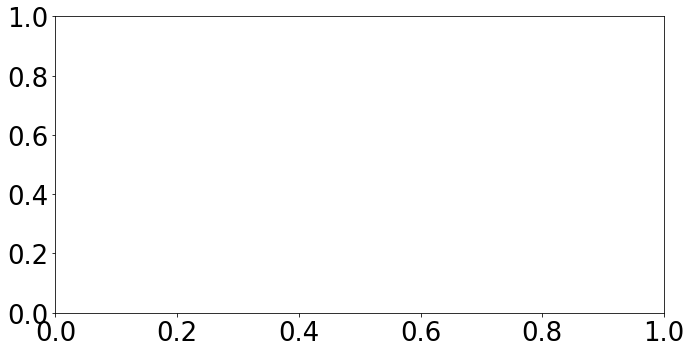

In [31]:
plot_outputs_single_network_arch_from_list('CNN_Vanilla', outputs, 'CNN Different Architectures', 'CNN', epochs)

In [ ]:
import pickle
a_file = open("data_0.8_0.1_0.1.pkl", "wb")
pickle. dump(outputs, a_file)
a_file. close()


In [4]:
#from utils import report_from, Verbosity, list_to_string,\
#    plot_outputs_single_network_arch_from_list
#
#def do_plots(outputs, hidden_size_list, epochs, list_archs_for_plot, filename):
#    print(f"{list_archs_for_plot=}")
#    my_net_len = len(hidden_size_list[0])
#    plot_outputs_single_network_arch_from_list(
#        filename,
#        outputs,
#        f"MLP Neural Networks Different Architectures with {my_net_len} Hidden Layers",
#        " 196_",
#        epochs,
#        list_archs_for_plot)

In [5]:
#list_list_list_arch_for_plot = [
#    [["MLP 196_600_196", "CC 196_400_196","CC_AUX 196_300_196"],
#     ["MLP 196_600_600_196", "CC 196_400_400_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_600_600_600_196", "CC 196_400_400_400_196", "CC_AUX 196_300_300_300_196"]],
#    [["MLP 196_500_196", "CC 196_400_196", "CC_AUX 196_300_196"],
#     ["MLP 196_500_500_196", "CC 196_400_400_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_500_500_500_196", "CC 196_400_400_400_196", "CC_AUX 196_300_300_300_196"]],
#    [["MLP 196_500_196", "CC 196_400_196", "CC_AUX 196_300_196"],
#     ["MLP 196_500_500_196", "CC 196_400_400_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_500_500_500_196", "CC 196_400_400_400_196", "CC_AUX 196_300_300_300_196"]]]


#list_list_list_arch_for_plot = [
#    [["MLP 196_600_196", "CC 196_400_196","CC_AUX 196_300_196"],
#     ["MLP 196_600_600_196", "CC 196_400_400_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_600_600_600_196", "CC 196_400_400_400_196", "CC_AUX 196_300_300_300_196"]],
#    [["MLP 196_500_196", "CC 196_400_196", "CC_AUX 196_300_196"],
#     ["MLP 196_500_500_196", "CC 196_400_400_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_500_500_500_196", "CC 196_400_400_400_196", "CC_AUX 196_300_300_300_196"]],
#    [["MLP 196_500_196", "CC 196_400_196", "CC_AUX 196_300_196"],
#     ["MLP 196_500_500_196", "CC 196_400_400_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_500_500_500_196", "CC 196_400_400_400_196", "CC_AUX 196_300_300_300_196"]],
#    [["MLP 196_300_196", "CC 196_300_196","CC_AUX 196_300_196"],
#     ["MLP 196_300_300_196", "CC 196_300_300_196", "CC_AUX 196_300_300_196"],
#     ["MLP 196_300_300_300_196", "CC 196_300_300_300_196", "CC_AUX 196_300_300_300_196"]],
#    [["MLP 196_400_196", "CC 196_400_196","CC_AUX 196_400_196"],
#     ["MLP 196_400_400_196", "CC 196_400_400_196", "CC_AUX 196_400_400_196"],
#     ["MLP 196_400_400_400_196", "CC 196_400_400_400_196", "CC_AUX 196_400_400_400_196"]],
#    [["MLP 196_500_196", "CC 196_500_196","CC_AUX 196_500_196"],
#     ["MLP 196_500_500_196", "CC 196_500_500_196", "CC_AUX 196_500_500_196"],
#     ["MLP 196_500_500_500_196", "CC 196_500_500_500_196", "CC_AUX 196_500_500_500_196"]],
#    [["MLP 196_600_196", "CC 196_600_196","CC_AUX 196_600_196"],
#     ["MLP 196_600_600_196", "CC 196_600_600_196", "CC_AUX 196_600_600_196"],
#     ["MLP 196_600_600_600_196", "CC 196_600_600_600_196", "CC_AUX 196_600_600_600_196"]]]

In [6]:
#for i, list_list_arch_for_plot in enumerate(list_list_list_arch_for_plot):
#    for layers, epochs, list_arch_for_plot in zip(layers_to_check,
#                                                  num_epochs,
#                                                  list_list_arch_for_plot):
#        hidden_sizes_list = []
#        filename = f"MLP_{layers}_LAYER_ARCHS"
#        hidden_sizes_list = []
#        for lw in layer_widths:
#            hidden_sizes_list.append([lw] * (layers-1) + [196])
#        if i == 0:
#            do_plots(outputs[layers], hidden_sizes_list,
#                     epochs, None, filename)
#        do_plots(outputs[layers], hidden_sizes_list,
#                 epochs, list_arch_for_plot, filename)
#print("DONE")

In [7]:
#import pickle
#a_file = open("data_0.8_0.1_0.1.pkl", "wb")
#pickle. dump(outputs, a_file)
#a_file. close()
#